# Simple Lineare Regression manuell Berechnen

In [6]:
# Import dstools (absolute path required, please change to your systems settings)
import importlib
import sys

path = '/dstools-master/dstools/__init__.py'
name = 'dstools'

spec = importlib.util.spec_from_file_location(name, path)
module = importlib.util.module_from_spec(spec)
sys.modules[spec.name] = module
spec.loader.exec_module(module)

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from dstools.datasets import sunshine

In [9]:
# Load the sunshine dataset
df = pd.read_csv('advertising.csv')
print(df)

      ID     TV  Radio  Newspaper  Sales
0      1  230.1   37.8       69.2   22.1
1      2   44.5   39.3       45.1   10.4
2      3   17.2   45.9       69.3    9.3
3      4  151.5   41.3       58.5   18.5
4      5  180.8   10.8       58.4   12.9
..   ...    ...    ...        ...    ...
195  196   38.2    3.7       13.8    7.6
196  197   94.2    4.9        8.1    9.7
197  198  177.0    9.3        6.4   12.8
198  199  283.6   42.0       66.2   25.5
199  200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]


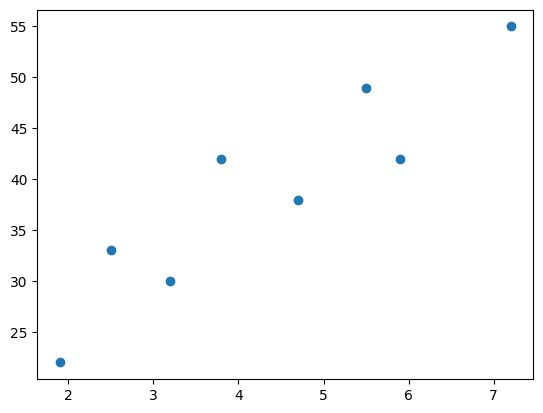

In [4]:
# Scatterplot
plt.plot(df['TV'], df['Sales'],'o');

## Response- und Prediktorvariable festlegen

Wir speichern die Werte der Prediktorvariablen in $x$ und die der Responsevariablen in $y$ und führen einige Abkürzungen zur besseren Lesbarkeit ein:

In [5]:
x = np.array(df.Sonnenstunden)
y = np.array(df.Konzertbesucher)

# Useful abbreviations
x_bar = np.mean(x)
y_bar = np.mean(y)
SXX = np.sum((x-x_bar)**2)
SXY = np.sum((x-x_bar)*(y-y_bar))

# Number of datapoints
n = np.size(x)

# Number of features
p = 1

## Berechnung der Koeffizienten

In der neuen Schreibweise berechnet sich der Regressionskoeffizient $\hat{\beta}_1$ als

$$\hat{\beta}_1 = \frac{SXY}{SXX}$$

Somit erhalten wir für die Regressionskoeffizienten:

In [6]:
beta_hat_1 = SXY/SXX
beta_hat_0 = y_bar - beta_hat_1 * x_bar
print(beta_hat_1)
print(beta_hat_0)

5.336410534890034
15.728319304914475


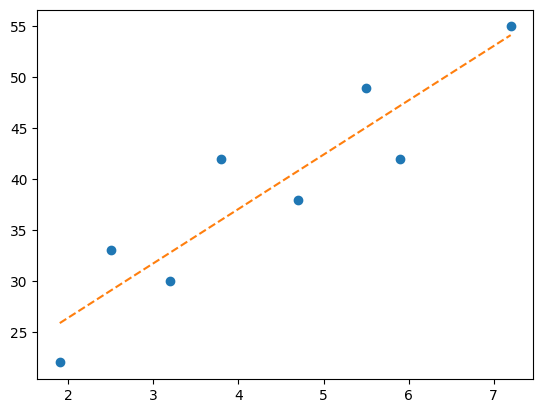

In [7]:
plt.plot(df['Sonnenstunden'], df['Konzertbesucher'],'o')
plt.plot(df['Sonnenstunden'], df['Sonnenstunden']*beta_hat_1 + beta_hat_0, '--');

## Residuen

Mit den Werten für $\hat{\beta}_0$ und $\hat{\beta}_1$ können wir die Prädiktoren $\hat{y}$ bestimmen. Daraus ergeben sich sofort die Residuen $e_i$, die wir in der Variable `res` speichern.

In [8]:
y_hat = beta_hat_1 * x + beta_hat_0

# Residuen
res = y - y_hat
print(res)

[-3.86749932  3.93065436 -2.80483302  5.99332066 -2.80944882  3.92142275
 -5.21314146  0.84952484]


Bei der Berechnung der Residuen geht es darum zu sehen, wie gut die Regressionslinie zu den Daten passt. Größere Residuen zeigen an, dass die Regressionslinie schlecht zu den Daten passt, d.h. die tatsächlichen Datenpunkte fallen nicht in die Nähe der Regressionslinie. Kleinere Residuen zeigen an, dass die Regressionslinie besser zu den Daten passt, d.h. die tatsächlichen Datenpunkte liegen nahe an der Regressionslinie.

Ein nützlicher Diagrammtyp zur gleichzeitigen Visualisierung aller Residuen ist ein **Residuendiagramm**. Ein Residuendiagramm (oder Residualplot) ist ein Diagrammtyp, der die vorhergesagten Werte gegen die Residuenwerte für ein Regressionsmodell anzeigt. Diese Art von Diagramm wird häufig verwendet, um zu bewerten, ob ein lineares Regressionsmodell für einen bestimmten Datensatz geeignet ist oder nicht, und um die Heteroskedastizität von Residuen zu überprüfen.

In der Praxis kann man Residuen als Abweichungen von der Regressionslinie betrachten. Wenn die Residuen zufällig um die Nulllinie streuen, ist dies ein Indikator für eine gute Regression. Andernfalls kann dies bedeuten, dass die Regression unzureichend oder falsch spezifiziert ist. Ein Residuendiagramm kann auch verwendet werden, um Ausreißer in den Daten aufzudecken.

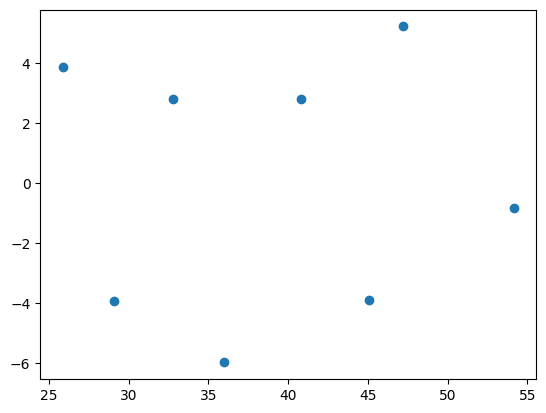

In [9]:
# Residual plot
plt.plot(y_hat, (y_hat-y), 'o');

## Standardfehler

Für die Berechnung der Standardfehler (Koeffizienten und Residuen) benötigen wie die RSS sowie $\sigma^2$, welches wir in `sigma_sq` speichern:

In [10]:
# Residual Sum of Squares (RSS)
RSS = np.sum(res**2)

# Sigma squared
sigma_sq = RSS/(n-p-1)

# Residual Standard Error (RSE)
RSE = np.sqrt(sigma_sq)
print("RSE: ", RSE)

# Standard Error of Regression Coefficients
se_beta_0 = np.sqrt(sigma_sq * (1/n + (x_bar**2)/SXX))
se_beta_1 = np.sqrt(sigma_sq/SXX)
print("SE(beta_0): ", se_beta_0, " SE(beta_1): ", se_beta_1)

RSE:  4.570989515784033
SE(beta_0):  4.437227000146887  SE(beta_1):  0.9527289390578388


## Mean Squared Error

In [11]:
MSE = RSS/n
print("MSE:", MSE)

MSE: 15.670458865055664


## Konfidenzintervall

In [12]:
from scipy import stats

# Approximation
CI_approx = np.array([[beta_hat_0 - 2*se_beta_0, beta_hat_0 + 2*se_beta_0],[beta_hat_1 - 2*se_beta_1, beta_hat_1 + 2*se_beta_1]])

# Get the value for the t-distribution with df=6:
studT = stats.t.ppf(1-0.025,6)

CI = np.array([[beta_hat_0 - studT*se_beta_0, beta_hat_0 + studT*se_beta_0],[beta_hat_1 - studT*se_beta_1, beta_hat_1 + studT*se_beta_1]])

print("CI_approx:\n", CI_approx)
print("CI:\n", CI)

CI_approx:
 [[ 6.8538653  24.60277331]
 [ 3.43095266  7.24186841]]
CI:
 [[ 4.87081597 26.58582264]
 [ 3.0051668   7.66765427]]


## Hypothesentests
### t-Statistik

Wir berechnen die t-Statistik für beide Regressionskoeffizienten

In [13]:
# t-Values
t_beta_1 = beta_hat_1/se_beta_1
t_beta_0 = beta_hat_0/se_beta_0
print("t_beta_0: ", t_beta_0, "\nt_beta_1: ", t_beta_1)

t_beta_0:  3.544628053600552 
t_beta_1:  5.6011844671867035


### p-Werte

Dazu interessieren uns jetzt die p-Werte, zu deren Berechnung Python einen Näherungsalgorithmus verwendet:

In [14]:
t = 3.54462805 # t-Value
f = 1.0
tz = 1.0
j = 2.0 # counter
k = 6.0 # degrees of freedom

z = 1 + (t**2)/k

while (j <= (k-2)) :
    tz = tz * ((j-1)/(z*j))
    f = f + tz
    j = j + 2
    
p = f * t / np.sqrt(z * k)
p = 0.5 + 0.5*p
p = 2*(1-p)
print(p)

0.012150695888024199


Man sieht sofort, dass die `while` Schleife in unserem einfachen Fall nur zweimal durchlaufen wird. Daher gilt für die Variablen $tz$ und $f$ mit $tz_0 = 1, j_0 = 2$:

$$tz_1 = tz_0 \frac{j_0 - 1}{zj_0} = \frac{1}{2z}$$
$$tz_2 = tz_1 \frac{j_i - 1}{zj_1} = \frac{1}{2z}\frac{3}{4z} = \frac{3}{8z^2}$$
$$f_1 = f_0 + tz_1 $$
$$f_2 = f_1 + tz_2 = f_0 + tz_1 + tz_2 = 1 + \frac{1}{2z} + \frac{3}{8z^2}$$

Somit folgt nach einer kleinen Umformung für die p-Werte:

$$p = 1 - \Big( 1 + \frac{1}{2z} + \frac{3}{8z^2} \Big) \frac{t}{\sqrt{6z}}$$

Eine Formel, die sich mit jedem besseren Taschenrechner ausrechnen läßt! Das wollen wir gleich testen:

In [15]:
t = t_beta_0
z = 1 + (t**2)/6

p_val = 1 - (1 + 1/(2*z) + 3/(8*(z**2)))*t/np.sqrt(6*z)
p_beta_0 = p_val
print(p_beta_0)

t = t_beta_1
z = 1 + (t**2)/6

p_val = 1 - (1 + 1/(2*z) + 3/(8*(z**2)))*t/np.sqrt(6*z)
p_beta_1 = p_val
print(p_beta_1)

0.012150695835125958
0.001379362627713876


## $R^2$

In [16]:
# Total sum of Squares
TSS = np.sum((y-y_bar)**2)

# R^2
R_sq = 1 - RSS/TSS
R_sq

np.float64(0.8394574407934108)

## Adjusted $R^2$

In [17]:
# Adjusted R^2
R_sq_adj = 1 - ((n-1)*RSS)/((n-2)*TSS)
R_sq_adj

np.float64(0.8127003475923127)

## F-Statistik

Leider gibt es für den p-Wert der F-Statistik keine einfache Näherungsformel, sondern nur eine komplizierte Iteration von Gamma- und Betafunktionen, deren Herleitung den Rahmen dieser Lehrveranstaltung übersteigt.

In [18]:
# F-Statistic
F_stat = (n-2)*((TSS-RSS)/RSS)
F_stat

np.float64(31.373267435453595)

## Log-Likelihood

In [19]:
LogLik = -(n/2)*np.log(2*np.pi) - (n/2)*np.log(RSS/n)-n/2
LogLik

np.float64(-22.358617621507904)

## AIC, BIC

In [20]:
k = 3
AIC = 2*k - 2*LogLik
BIC = np.log(n)*k - 2*LogLik
print("AIC: ", AIC, "\nBIC: ", BIC)

AIC:  50.71723524301581 
BIC:  50.95555986805532


# Zusammenfassung

In [21]:
print("beta_0\t\t", beta_hat_0)
print("beta_1\t\t", beta_hat_1)
print("t beta_0\t", t_beta_0)
print("t beta_1\t", t_beta_1)
print("p beta_0\t", p_beta_0)
print("p beta_1\t", p_beta_1)
print("CI beta0 lo\t", CI[0][0])
print("CI beta0 hi\t", CI[0][1])
print("CI beta1 lo\t", CI[1][0])
print("CI beta1 hi\t", CI[1][1])
print("R^2\t\t", R_sq)
print("adj. R^2\t", R_sq_adj)
print("F-Stat\t\t", F_stat)
print("LogLik\t\t", LogLik)
print("AIC\t\t", AIC)
print("BIC\t\t", BIC)

beta_0		 15.728319304914475
beta_1		 5.336410534890034
t beta_0	 3.544628053600552
t beta_1	 5.6011844671867035
p beta_0	 0.012150695835125958
p beta_1	 0.001379362627713876
CI beta0 lo	 4.870815972034617
CI beta0 hi	 26.585822637794333
CI beta1 lo	 3.0051668029806353
CI beta1 hi	 7.667654266799433
R^2		 0.8394574407934108
adj. R^2	 0.8127003475923127
F-Stat		 31.373267435453595
LogLik		 -22.358617621507904
AIC		 50.71723524301581
BIC		 50.95555986805532
